In [1]:
#感知器是一个二分类器其净输入为z = W.T*X，
#通过激活函数可以将z映射为1(z>=θ)或-1(z<θ)
import numpy as np 
import pandas as pd 

In [12]:
data = pd.read_csv(r"iris.csv")
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
#之所以映射为1与-1而不是之前的0,1,2，是因为感知器的预测结果为1，-1
#目的是为了与感知器预测的结果相符
data["class"] = data["class"].map({"Iris-versicolor":0,"Iris-virginica":1,"Iris-setosa":-1})
# data["class"].value_counts()
data = data[data["class"]!=0]
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [21]:
class Perception:
    '''使用python语言实现感知器算法，实现二分类'''
    def __init__(self,alpha,times):
        '''初始化方法。 
        Parameters
        ----- 
        alpha:float 
            学习率 
        times :int 
            最大迭代次数 
        '''
        self.alpha = alpha
        self.times = times
    def step(self,z):#阶跃函数，类似于逻辑回归中的sigmoid函数，但是更加简单
        '''阶跃函数 
        Parameters
        ----- 
        z: 数组类型 (或者是标量类型)
            阶跃函数的参数，可以根据z得值，返回1或者-1，(这样可以实现去二分类)
        Returns
        -----
        value: int
            如果z>=0返回1，否则返回-1 
        '''
        
#        return 1 if z>=0 else 0
        return np.where(z>=0,1,-1)#如果z>=0返回1，否则返回-1，其中z是标量或者数组都行，np.where能个矢量化的实现
    def fit(self,X,y):
        '''根据提供的训练数据，对模型进行训练。 
        Parameters： 
        ---- 
        X: 类数组类型， 形状: [样本数量，特征数量]
            待训练的样本数据 
        y: 类数组类型，形状: [样本数量]
            每个样本的目标值。(分类)
        '''
        
        X = np.asarray(X)
        y = np.asarray(y)
        #创建权重的向量，初始值为0.(多出来的一个是截距w0)
        self.w_ = np.zeros(X.shape[1]+1)
        #创建损失列表，用来保存每次迭代后的损失值
        self.lose_ = []
        #循环指定的次数。
        for i in range(self.times):
            #感知器与逻辑回归的区别：逻辑回归中，使用所有样本计算梯度，然后更新权重
            #而感知器中，是使用单个样本，依次进行计算梯度，更新权重
            lose = 0#记录每个样本产生的损失值
            for x ,target in zip(X,y):
                #计算预测值
                y_hat = self.step(np.dot(x,self.w_[1:])+self.w_[0])
                lose+=y_hat!=target#当预测值与真实值不同，loss+1
                #更新权重
                #更新公式：w(j) = w(j)+学习率*(真实值-预测值)*x(j)
                self.w_[0]+=self.alpha*(target-y_hat)*1
                self.w_[1:]+=self.alpha*(target-y_hat)*x
            #将循环中累计的误差值增加到误差列表中
            self.lose_.append(lose)
    def predict(self,X):
        '''根据参数传递的样本，对样本数据进行预测(1,-1)
        Parameters： 
        ---- 
        X: 类数组类型， 形状: [样本数量，特征数量]
            待预测的样本数据 
        Returns 
        ----
        result:数组类型 
            预测的结果值(1,-1)
        '''

        return self.step(np.dot(X,self.w_[1:])+self.w_[0])

In [25]:
t1 = data[data["class"]==1]
t2 = data[data["class"]==-1]
t1 = t1.sample(len(t1),random_state=0)
t2 = t2.sample(len(t2),random_state=0)
train_X = pd.concat([t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)#竖向连接
train_y = pd.concat([t1.iloc[:40,-1],t2.iloc[:40,-1]],axis=0)#竖向连接
test_X = pd.concat([t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)#竖向连接
test_y = pd.concat([t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)#竖向连接
p = Perception(0.005,20)
p.fit(train_X,train_y)
result = p.predict(test_X)
display(result)
display(test_y.values)
display(p.lose_)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

[1, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [26]:
#可视化展示：
import matplotlib as mpl
from matplotlib import pyplot as plt
#默认情况下不支持中文显示，需要进行设置
#设置黑体，支持中文显示
mpl.rcParams["font.family"] = "SimHei"
#在设置中文字体时，能够正常的显示符号
mpl.rcParams["axes.unicode_minus"] = False

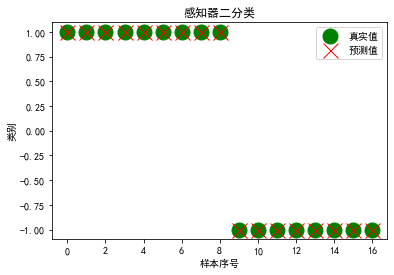

In [27]:
#绘制真实值
plt.plot(test_y.values,"go",ms=15,label="真实值")
plt.plot(result,"rx",ms=15,label="预测值")
plt.title("感知器二分类")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()

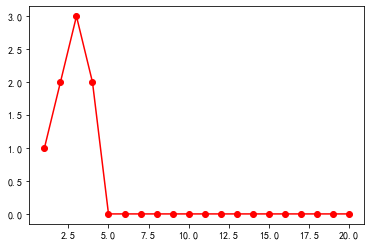

In [28]:
#绘制目标函数的损失值：
plt.plot(range(1,p.times+1),p.lose_,"ro-")
plt.show()